In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [31]:
df = pd.read_csv("insurance.csv")
df.head()#Mostrando as 5 primeiras linhas da tabela

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [33]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Após a analise das descrições dos dados, vemos que não há valores faltantes e não apresenta outlies significativos, mas vou fazer um plot para ver a distribuição dos dados e ver se estão normalizados ou se há dados irregulares!

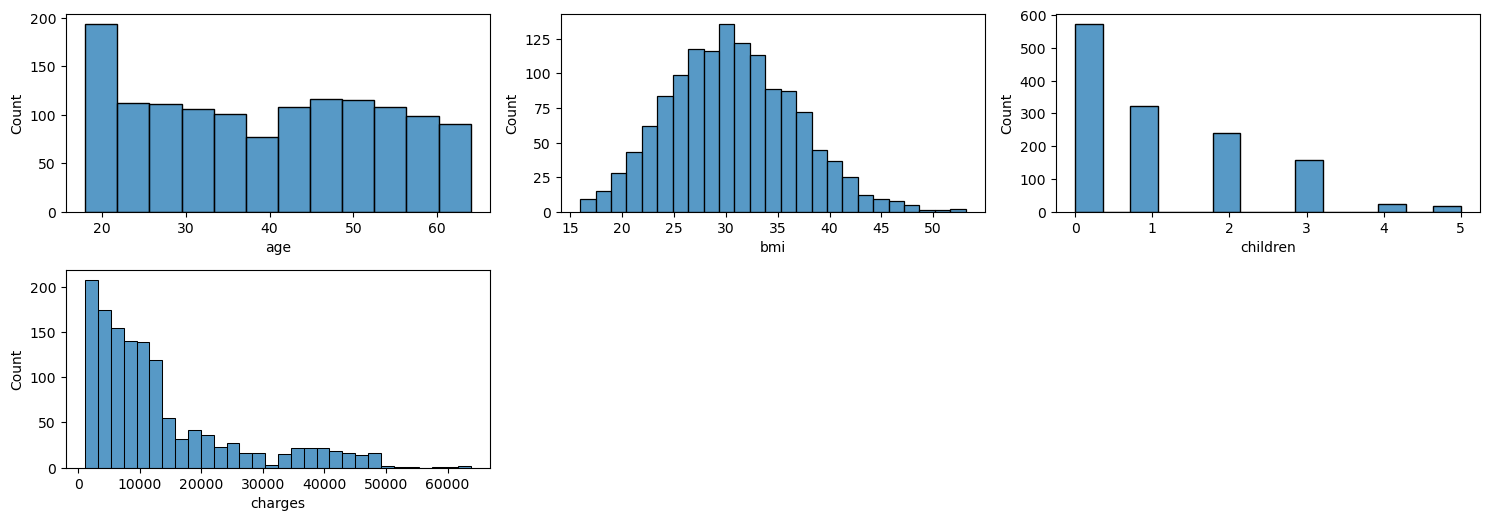

In [34]:
colunasNumericas = df.select_dtypes(include = "number").columns

numeroCols = len(colunasNumericas)
numeroLinhas = (numeroCols + 2)/3

plt.figure(figsize=[15, 5 * numeroLinhas])
for i, coluna in enumerate(colunasNumericas):
    plt.subplot(numeroCols, 3, i+1)
    sns.histplot(df[coluna])
plt.tight_layout()
plt.show()

Após a analise, fica nitido que a coluna charge(valor cobrado) há uma distribuição assimétrica o que vamos ter que tratar depois. Então vamos analisar a influência dessas feutures com a a target(charge)

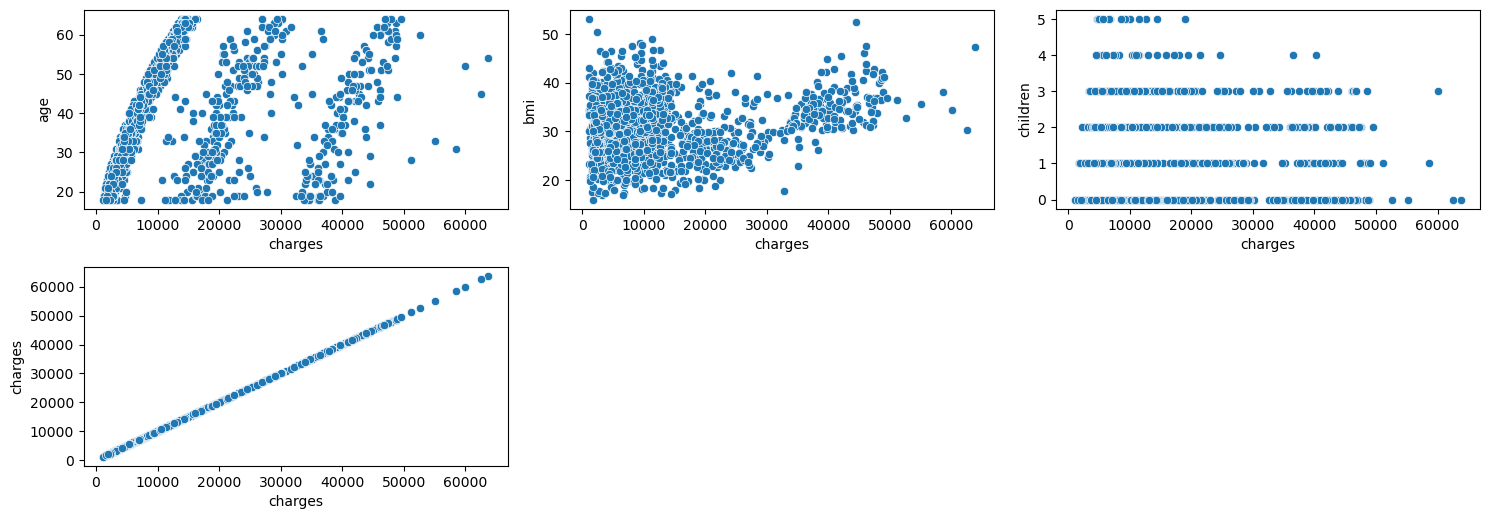

In [35]:

numeroCols = len(colunasNumericas)
numeroLinhas = (numeroCols + 2)/3

plt.figure(figsize=[15, 5 * numeroLinhas])
for i, coluna in enumerate(colunasNumericas):
    plt.subplot(numeroCols, 3, i+1)
    sns.scatterplot(x=df["charges"], y=df[coluna])
plt.tight_layout()
plt.show()

Após a analise fica claro que a assimetria da target acabou deixando uma analise muito confusa, podemos perceber segmentações de dados, mas não fica muito claro, então irei tratar a target e analisar novamente os dados e ver as relações entre essas variáveis

In [36]:
df["chargeLog"] = np.log(df["charges"])

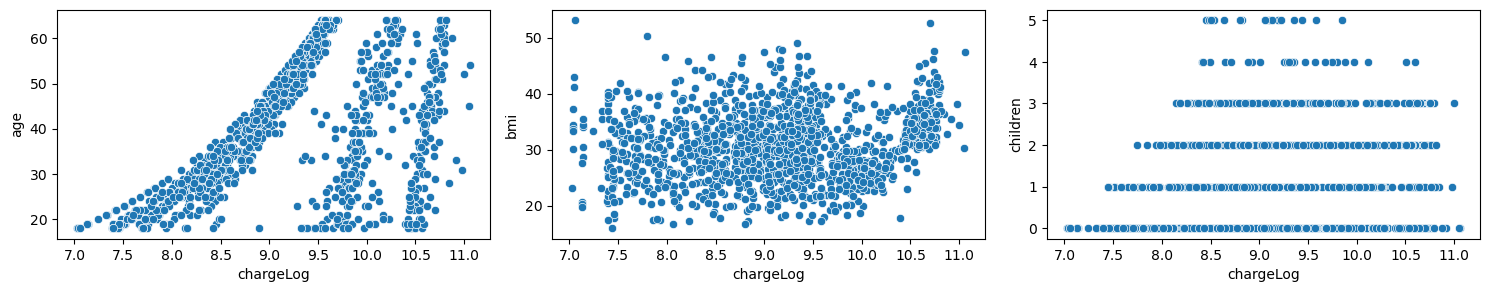

In [37]:
colunasNumericas =['age', 'bmi', 'children']
numeroCols = len(colunasNumericas)
numeroLinhas = (numeroCols + 2)/3

plt.figure(figsize=[15, 5 * numeroLinhas])
for i, coluna in enumerate(colunasNumericas):
    plt.subplot(numeroCols, 3, i+1)
    sns.scatterplot(x=df["chargeLog"], y=df[coluna])
plt.tight_layout()
plt.show()

Após a tranformação logaritimica, percebemos um correlação confusa, mas com indícios que a idade influencía nos gastos no seguro, as pessoas mais velha tendem a ter um custo maior, mas para confirmar essa hipótese vou analisar a correlação das variaveis e ver se estou certo!

In [38]:
df[['age', 'bmi', 'children', 'chargeLog']].corr()

,age,bmi,children,chargeLog
age,1.000000,0.109272,0.042469,0.527834
bmi,0.109272,1.000000,0.012759,0.132669
children,0.042469,0.012759,1.000000,0.161336
chargeLog,0.527834,0.132669,0.161336,1.000000


A análise dos dados revela uma forte correlação positiva entre a idade dos pacientes e os gastos do seguro, indicando que pacientes mais velhos tendem a gerar custos significativamente maiores. Esse padrão é consistente com a realidade do setor de saúde e parece ter uma certa relação em quantidade de filhos e os gastos, o que também faz sentido, já que com mais crianças os gastos de saúde são bem maiores. Agora vamos analisar o quanto as variaveis categóricas influenciam nos custos(charges)

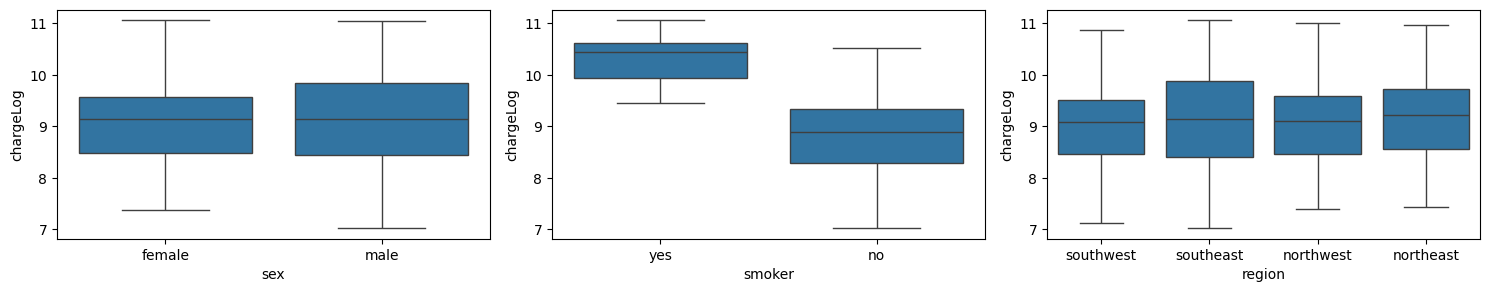

In [39]:
variaveisCategoricas =['sex', 'smoker', 'region']

numeroCols = len(variaveisCategoricas)
numeroLinhas = (numeroCols + 2)/3

plt.figure(figsize=[15, 5 * numeroLinhas])
for i, coluna in enumerate(variaveisCategoricas):
    plt.subplot(numeroCols, 3, i+1)
    sns.boxplot(x=df[coluna], y=df["chargeLog"])
plt.tight_layout()
plt.show()

Após a analise dos gráficos, fica nítido que os que fumam tendem a ter gastos maiores, enquanto as outras features estão bem distribuídas, sem apresentar diferenças significativas! Vamos ver se esses fumantes tem idades mais altas para analisarmos se há um padrão entre essas duas features!

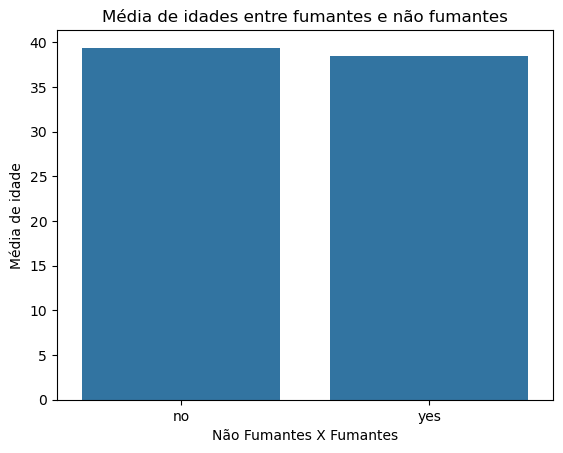

In [40]:
mediaDeIdadeDeFumantesENaoFumantes = df[["smoker", "age"]].groupby("smoker").mean()
sns.barplot(mediaDeIdadeDeFumantesENaoFumantes, x="smoker", y="age")
plt.xlabel("Não Fumantes X Fumantes")
plt.ylabel("Média de idade")
plt.title("Média de idades entre fumantes e não fumantes")
plt.show()

Analisando o gráfico acima, não aparentar ter uma diferença grande, logo não há ua relação entre essas duas features! Vou analisar se existe entre a  a feature smoker e children

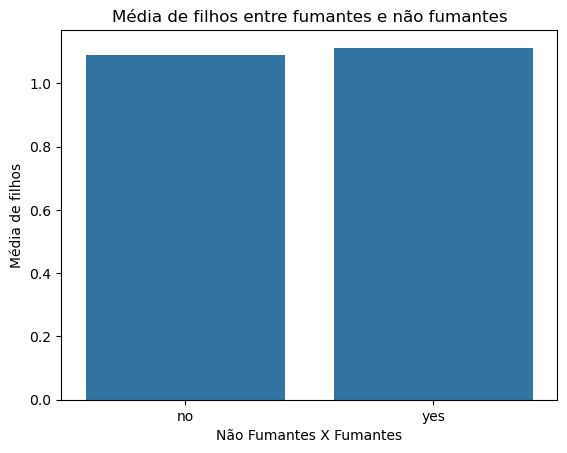

In [41]:
mediaDeIdadeDeFumantesENaoFumantes = df[["smoker", "children"]].groupby("smoker").mean()
sns.barplot(mediaDeIdadeDeFumantesENaoFumantes, x="smoker", y="children")
plt.xlabel("Não Fumantes X Fumantes")
plt.ylabel("Média de filhos")
plt.title("Média de filhos entre fumantes e não fumantes")
plt.show()

O gráfico acima também não apresenta diferenças de média de filhos o que nos mostra que não há uma relação entre essas features. Agora vou começar o tratamento das variaveis categoricas para passar para construção do modelo preditivo!

In [42]:
df_tratado = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)#Tranformando features categoricas em numericas

In [43]:
df_tratado.head()

,age,bmi,children,charges,chargeLog,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,9.734176,False,True,False,False,True
1,18,33.770,1,1725.55230,7.453302,True,False,False,True,False
2,28,33.000,3,4449.46200,8.400538,True,False,False,True,False
3,33,22.705,0,21984.47061,9.998092,True,False,True,False,False
4,32,28.880,0,3866.85520,8.260197,True,False,True,False,False


In [46]:
df_tratado.to_csv("Base de Dados Tratada (insurance).csv")